### Support Vector Machine (SVM) การกำหนดเส้นแบ่ง แยกแยะกลุ่มข้อมูล
เป็นอัลกอริทึมที่สามารถนำมาช่วยแก้ปัญหาการจำแนกข้อมูล ใช้ในการวิเคราะห์ข้อมูลและจำแนกข้อมูล โดยอาศัยหลักการของการหาสัมประสิทธิ์ของสมการเพื่อสร้างเส้นแบ่งแยกกลุ่มข้อมูลที่ถูกป้อนเข้าสู่กระบวนการสอนให้ระบบเรียนรู้ โดยเน้นไปยังเส้นแบ่งแยกแยะกลุ่มข้อมูลได้ดีที่สุด

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#%matplotlib inline 
#pip install openpyxl

In [10]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
# การดูข้อมูลคอลัมน์ Outcome
d = df['Outcome'].unique()
d

array([1, 0], dtype=int64)

การอธิบายความหมายในแต่ละคอลัมน์
1) Pregnancies:จำนวนครั้งที่ตั้งครรภ์
2) Glucose: กลูโคส
3) BloodPressure: ความดันโลหิต
4) SkinThickness: ความหนาของผิวหนัง
5) Insuline: อินซูลิน
6) BMI: ดัชนีมวลกาย (น้ำหนักเป็นกิโลกรัม/(ส่วนสูงเป็นเมตร)^2)
7) DiabetesPedigreeFunction: ตรวจหาแนวโน้มการเป็นเบาหวาน
8) Age: อายุ
9) Outcome: ผลลัพธ์ ตัวแปรคลาส (0: ไม่เป็นเบาหวาน, 1: เป็นเบาหวาน)

การแปลงตัวเลขให้เป็นตัวอักษร เช่น 0 เป็น 'No_Diabetes' คือไม่เป็นเบาหวาน, 1 เป็น 'Diabetes' คือเป็นเบาหวาน

In [5]:
# #Label Encoding: การแปลงตัวอักษรให้เป็นตัวเลข
# class_names, y = np.unique(df['Outcome'], return_inverse=True)
# class_names
# y

# import numpy as np
# df['Outcome'] = np.where(df['Outcome']==0, 'No', 'Yes')

# target_map = {0: 'No_Diabetes', 1: 'Diabetes'}
# df['Outcome'] = df['Outcome'].map(target_map)

# df.sample(5,random_state=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [17]:
X_test 

array([[0.000e+00, 1.020e+02, 5.200e+01, ..., 2.510e+01, 7.800e-02,
        2.100e+01],
       [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       [1.000e+00, 1.030e+02, 3.000e+01, ..., 4.330e+01, 1.830e-01,
        3.300e+01],
       ...,
       [1.300e+01, 1.530e+02, 8.800e+01, ..., 4.060e+01, 1.174e+00,
        3.900e+01],
       [2.000e+00, 1.120e+02, 7.800e+01, ..., 3.940e+01, 1.750e-01,
        2.400e+01],
       [1.000e+01, 1.620e+02, 8.400e+01, ..., 2.770e+01, 1.820e-01,
        5.400e+01]])

StandardScaler คือการแปลงสเกลข้อมูล Features (คุณสมบัติ) ที่มีหน่วยวัดแตกต่างกัน ให้มีสเกลหน่วยวัดเหมือนกัน เช่น บางข้อมูลมีหน่วยวัดเป็น กิโลเมตร เมตร เซนติเมตร หรือบาท เป็นต้น ดังนั้นการกำหนดสเกลให้เหมือนกัน โดยการปรับให้ค่าเฉลี่ย (Mean) เท่ากับ 0 และค่าเบี่ยงแบนมาตรฐาน (Standard Deviation: SD) เท่ากับ 1 ตาม coding ดังต่อไปนี้

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print('\nX_train\n', X_train, '\n\n\nX_test\n', X_test)


X_train
 [[-1.13532702 -0.69874191  0.0085509  ... -0.17349811  0.39637473
  -1.02759133]
 [-1.13532702  0.28952968  0.94778927 ... -0.07288419  0.83931332
  -0.10313474]
 [ 2.41960365 -1.08129866  0.21727054 ...  0.39245516 -0.26803316
   1.2415294 ]
 ...
 [ 0.34589409 -0.22054598  0.32163035 ... -0.12319115 -0.37421707
   0.90536336]
 [ 0.64213832 -0.73062164 -0.5132482  ... -0.66399094  0.09299213
  -0.10313474]
 [ 1.53087099 -0.98565947 -0.09580892 ... -1.0035629  -0.80805418
   2.08194448]] 


X_test
 [[-1.13532702 -0.63498246 -0.93068747 ... -0.89037224 -1.17818095
  -1.02759133]
 [ 0.04964987 -1.4638554  -0.40888838 ...  0.22895755 -0.22859342
  -0.6914253 ]
 [-0.8390828  -0.60310273 -2.07864548 ...  1.39859429 -0.85962922
  -0.01909323]
 ...
 [ 2.71584788  0.99088371  0.94778927 ...  1.05902233  2.14689232
   0.48515582]
 [-0.54283858 -0.31618517  0.42599017 ...  0.90810146 -0.88389983
  -0.77546681]
 [ 1.82711521  1.27780127  0.73906963 ... -0.56337702 -0.86266305
   1.745778

In [19]:
from sklearn.svm import SVC
#model = SVC(kernel='linear')
#model = SVC(kernel='linear', probability=True)
#model = SVC(kernel='poly', degree=3, gamma='auto')
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict.reshape(-1, 1)


array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [20]:
y_predict.reshape(-1, 1)

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [21]:
# การประเมินโมเดล
accuracy = model.score(X_test, y_test).round(2)
print('Test accuracy:', accuracy)

Test accuracy: 0.75


In [22]:
class_names = df['Outcome'].unique()
class_names

array([1, 0], dtype=int64)

การประเมินโมเดลด้วย confusion matrix ในกรณีที่ class เป็น Diabetes: เป็นเบาหวาน หรือ No_Diabetes: ไม่เป็นเบาหวาน

In [24]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_predict)))
# #print('Accuracy Score:',accuracy_score(y_test, y_predict).round(2))
# print(classification_report(y_test, y_predict, target_names=class_names))
# cm = confusion_matrix(y_test, y_predict)
# print(cm)

# #pip install scikit-plot
# import scikitplot as skplot
# plt.rcParams['figure.figsize'] = 6,6 #10 x 10
# skplot.metrics.plot_confusion_matrix(y_test, y_predict)
# plt.show()

การประเมินโมเดลด้วย confusion matrix ในกรณีที่ class เป็น 0: เป็นเบาหวาน หรือ 1: ไม่เป็นเบาหวาน

confusion_matrix
 [[131  21]
 [ 37  42]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       152
           1       0.67      0.53      0.59        79

    accuracy                           0.75       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



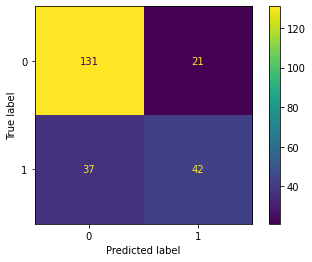

In [25]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#การประเมินโมเดลที่เป็นตาราง
confusion_matrix = confusion_matrix(y_test, y_predict)
print("confusion_matrix\n", confusion_matrix)
print(classification_report(y_test, y_predict))

#การประเมินโมเดลที่เป็นรูปสี
# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [26]:
#การพยากรณ์เบาหวานในสตรีมีครรภ์
#pred = model.predict([[1,116,78,29,180,36.1,0.496,25]])
pred = model.predict([[3,61,82,28,0,34.4,0.243,46]])
print('การพยากรณ์เบาหวานในสตรีมีครรภ์พบว่า: ', pred)

การพยากรณ์เบาหวานในสตรีมีครรภ์พบว่า:  [1]


##### การนำโมเดลไปพยากรณ์

In [12]:
#Take input from user 
Pregnancies = float(input("Enter Pregnancies: "))
Glucose = float(input("Enter Glucose: "))
BloodPressure = float(input("Enter BloodPressure: "))
SkinThickness = float(input("Enter SkinThickness: "))
Insulin = float(input("Enter Insulin: "))
BMI = float(input("Enter BMI: "))
DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction: "))
Age = float(input("Enter Age: "))

In [17]:
result = model.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
print("การตรวจเบาหวานในสตรีมีครรภ์พบว่ามีค่าเป็น:", result, "(0 = ไม่เป็นเบาหวาน, 1 = เป็นเบาหวาน)")

การตรวจเบาหวานในสตรีมีครรภ์พบว่ามีค่าเป็น: [0] (0 = ไม่เป็นเบาหวาน, 1 = เป็นเบาหวาน)


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


การบันทึกโมเดล เพื่อนำไปใช้งาน หรือนำไปพัฒนาระบบดิจิทัลด้วย Python Django

วิธีที่ 1

In [27]:
#https://www.youtube.com/watch?v=rNhVBv0i4os
# วิธีที่ 1

from joblib import dump

dump(model, 'diabet_model.joblib')

['diabet_model.joblib']

วิธีที่ 2

In [ ]:
# # วิธีที่ 2
# from pandas import read_csv

# #Pickle model 
# pd.to_pickle(model, 'model.pickle')

# #Unpickle model 
# model = pd.read_pickle('model.pickle')

วิธีที่ 3

In [28]:
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'diabet_model.pkl')
model = joblib.load('diabet_model.pkl')

วิธีที่ 4

In [ ]:
# # save the model to disk
# import joblib 
# filename = 'model.sav'
# joblib.dump(model, filename)